In [2]:
import certifi
import skimage
import kornia
import pydicom
from fastai.basics import *
from fastai.vision.all import *
from fastai.data.transforms import *

import pydicom,kornia
from pydicom.dataset import Dataset as DcmDataset
from pydicom.tag import BaseTag as DcmTag
from pydicom.multival import MultiValue as DcmMultiValue
from PIL import Image

try:
    import cv2
    cv2.setNumThreads(0)
except: pass
from fastai.basics import *
from fastai.callback.all import *
from fastai.vision.all import *
from fastai.medical.imaging import *

import pydicom
import seaborn as sns
matplotlib.rcParams['image.cmap'] = 'bone'
import pandas as pd

import pydicom
import numpy as np
from matplotlib import pyplot as plt
import pylibjpeg

import os
import seaborn as sns
#from pandas_profiling import ProfileReport
import pydicom
from glob import glob
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
from pydicom.pixel_data_handlers.util import apply_voi_lut
import matplotlib.pyplot as plt
from skimage import exposure
import cv2
import warnings
warnings.filterwarnings('ignore')
import pydicom
import os
from PIL import Image
import pandas as pd
from tqdm.auto import tqdm
import numpy as np
from pydicom.pixel_data_handlers.util import apply_voi_lut
from fastai.vision.all import *
#import albumentations as A
import cv2
from pathlib import Path
from joblib import Parallel, delayed
import shutil
#from ensemble_boxes import *
import pandas as pd
import codecs
import certifi
import skimage
import kornia
import pydicom
from fastai.basics import *
from fastai.vision.all import *
from fastai.data.transforms import *

import pydicom,kornia
from pydicom.dataset import Dataset as DcmDataset
from pydicom.tag import BaseTag as DcmTag
from pydicom.multival import MultiValue as DcmMultiValue
from PIL import Image

try:
    import cv2
    cv2.setNumThreads(0)
except: pass
from fastai.basics import *
from fastai.callback.all import *
from fastai.vision.all import *
from fastai.medical.imaging import *

import pydicom
import seaborn as sns
matplotlib.rcParams['image.cmap'] = 'bone'
import pandas as pd

import pydicom
import numpy as np
from matplotlib import pyplot as plt
import pylibjpeg

import os
import seaborn as sns
#from pandas_profiling import ProfileReport
import pydicom
from glob import glob
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
from pydicom.pixel_data_handlers.util import apply_voi_lut
import matplotlib.pyplot as plt
from skimage import exposure
import cv2
import warnings
warnings.filterwarnings('ignore')
import pydicom
import os
from PIL import Image
import pandas as pd
from tqdm.auto import tqdm
import numpy as np
from pydicom.pixel_data_handlers.util import apply_voi_lut
from fastai.vision.all import *
#import albumentations as A
import cv2
from pathlib import Path
from joblib import Parallel, delayed
import shutil
#from ensemble_boxes import *
import pandas as pd
import codecs

In [ ]:
!pip install fastai-amalgam

In [12]:
Albumin = DataBlock(
        blocks=(ImageBlock(cls=PILImage), RegressionBlock),    # CategoryBlockがデフォルト https://docs.fast.ai/data.block.html
        splitter = RandomSplitter(),
        #getters=[ColReader('file'), ColReader('Sex')],
        get_x=ColReader('dir'),
        get_y=ColReader('ALB（BCP改'),
        item_tfms = Resize(224)#(128)#(224)#, method='squish')
        #batch_tfms = [*aug_transforms(size = 384, mult=0.5), Normalize.from_stats(mean=0.53, std=0.23)]
        #batch_tfms=aug_transforms(max_zoom=1., flip_vert=True, max_lighting=0., max_warp=0.) + [Normalize]
        #item_tfms=Resize(460, method='squish'),
        #batch_tfms=[*aug_transforms(size=224, max_warp=0)]
        )

In [13]:
alb= Albumin.dataloaders(over65merge, bs=32)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


In [14]:
alearn = cnn_learner(alb, resnet152,  y_range=(1,5), loss_func=MSELossFlat(), metrics=rmse)#50 101 152  #130, 200 y_range=(100,200),
alearn.fine_tune(4)

epoch,train_loss,valid_loss,_rmse,time
0,1.328177,0.793192,0.890613,04:19


epoch,train_loss,valid_loss,_rmse,time
0,0.416277,0.292089,0.540453,04:41
1,0.267389,0.235961,0.485758,04:41
2,0.215829,0.202831,0.450367,04:41
3,0.145470,0.183299,0.428135,04:44


In [ ]:
alearn.show_results()

In [15]:
preds, trues = alearn.tta()

In [16]:
preds = to_np(preds)
trues = to_np(trues)
preds2=np.squeeze(preds)
preds2

array([2.8738103, 4.0517244, 3.3160744, ..., 3.5509548, 2.7608948,
       3.2852814], dtype=float32)

Text(0, 0.5, '$Xray Calculated Height$')

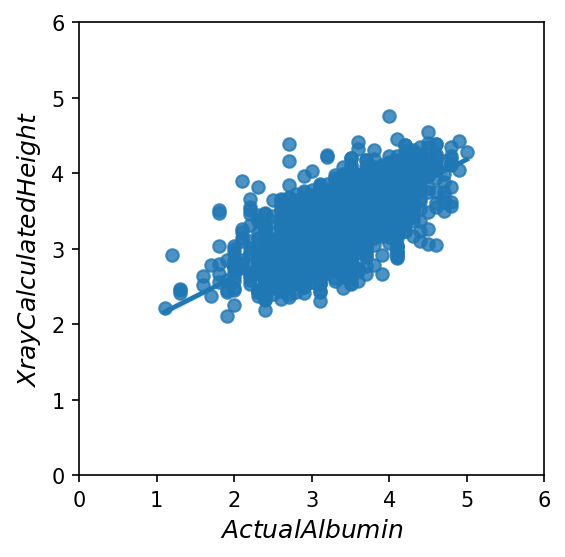

In [19]:
plt.figure(figsize=(4, 4), dpi=150)
#plt.scatter(trues, preds)
plt.xlim(0, 6)
plt.ylim(0, 6)
#plt.xlim(1, 3)
#plt.ylim(1, 3)
sns.regplot(x=trues, y=preds2);
#sns.jointplot(preds2, trues, kind="reg")

plt.xlabel(r'$Actual Albumin$', fontsize=12)
plt.ylabel(r'$Xray Calculated Height$', fontsize=12)

In [18]:
np.corrcoef(preds2, trues)

array([[1.        , 0.69792414],
       [0.69792414, 1.        ]])

In [65]:
CRP = DataBlock(
        blocks=(ImageBlock(cls=PILImage), RegressionBlock),    # CategoryBlockがデフォルト https://docs.fast.ai/data.block.html
        splitter = RandomSplitter(),
        #getters=[ColReader('file'), ColReader('Sex')],
        get_x=ColReader('dir'),
        get_y=ColReader('CRP'),
        item_tfms = Resize(224)#(128)#(224)#, method='squish')
        #batch_tfms = [*aug_transforms(size = 384, mult=0.5), Normalize.from_stats(mean=0.53, std=0.23)]
        #batch_tfms=aug_transforms(max_zoom=1., flip_vert=True, max_lighting=0., max_warp=0.) + [Normalize]
        #item_tfms=Resize(460, method='squish'),
        #batch_tfms=[*aug_transforms(size=224, max_warp=0)]
        )

In [66]:
CRPdls= CRP.dataloaders(over65merge, bs=32)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


In [67]:
CRPlearn = cnn_learner(CRPdls, resnet152,  y_range=(0,30), loss_func=MSELossFlat(), metrics=rmse)#50 101 152  #130, 200 y_range=(100,200),
CRPlearn.fine_tune(4)

epoch,train_loss,valid_loss,_rmse,time
0,92.213936,38.617233,6.214276,03:57


epoch,train_loss,valid_loss,_rmse,time
0,37.958412,37.900246,6.156318,04:18
1,34.490437,28.744102,5.361353,04:17
2,29.545633,26.034559,5.102407,04:18
3,20.189846,24.115921,4.910797,04:18


In [68]:
preds, trues = CRPlearn.tta()

In [69]:
preds = to_np(preds)
trues = to_np(trues)
preds2=np.squeeze(preds)
preds2

array([2.8392024 , 0.22530605, 4.8480873 , ..., 1.5766332 , 1.4088808 ,
       1.9753897 ], dtype=float32)

Text(0, 0.5, '$Xray Calculated CRP$')

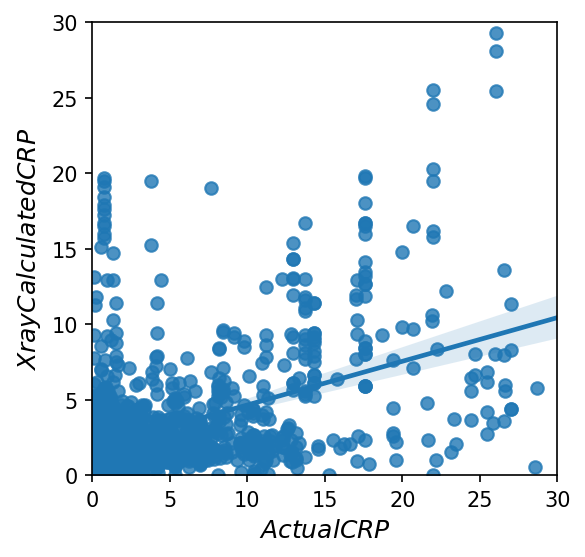

In [70]:
plt.figure(figsize=(4, 4), dpi=150)
#plt.scatter(trues, preds)
plt.xlim(0, 30)
plt.ylim(0, 30)
#plt.xlim(1, 3)
#plt.ylim(1, 3)
sns.regplot(x=trues, y=preds2);
#sns.jointplot(preds2, trues, kind="reg")

plt.xlabel(r'$Actual CRP$', fontsize=12)
plt.ylabel(r'$Xray Calculated CRP$', fontsize=12)

In [71]:
np.corrcoef(preds2, trues)

array([[1.        , 0.49460985],
       [0.49460985, 1.        ]])

In [356]:
##CONUT sum
over65merge = pd.merge(over65, wwfinalmerge, on='ID')
#over65merge = over65merge.drop_duplicates(subset='ID')
over65merge = over65merge.dropna(subset=['CONUT sum'])
#df.dropna(subset=['age'])
over65merge['mCONUT']= over65merge['CONUT sum'].apply(lambda x : 'Normal' if x <= 1 else ('Light' if x > 1 and x <= 4 else('Moderate' if x > 4 and x <= 8  else 'Severe')))

In [189]:
CONUT = DataBlock(
        blocks=(ImageBlock(cls=PILImage), CategoryBlock),    # CategoryBlockがデフォルト https://docs.fast.ai/data.block.html
        splitter = RandomSplitter(),
        #getters=[ColReader('file'), ColReader('Sex')],
        get_x=ColReader('dir'),
        get_y=ColReader('mCONUT'),
        item_tfms = Resize(224)#(128)#(224)#, method='squish')
        #batch_tfms = [*aug_transforms(size = 384, mult=0.5), Normalize.from_stats(mean=0.53, std=0.23)]
        #batch_tfms=aug_transforms(max_zoom=1., flip_vert=True, max_lighting=0., max_warp=0.) + [Normalize]
        #item_tfms=Resize(460, method='squish'),
        #batch_tfms=[*aug_transforms(size=224, max_warp=0)]
        )

In [190]:
CONUTdls= CONUT.dataloaders(over65merge, bs=32)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


In [191]:
CONUTlearn = cnn_learner(CONUTdls,resnet34, metrics=accuracy)#50 101 152  #130, 200 y_range=(100,200),
CONUTlearn.fine_tune(4)

epoch,train_loss,valid_loss,accuracy,time
0,1.560960,1.218146,0.502865,04:04


epoch,train_loss,valid_loss,accuracy,time
0,1.154174,1.080555,0.529131,03:59
1,0.934319,0.917210,0.612225,03:58
2,0.706382,0.868333,0.652818,03:58
3,0.405614,0.929361,0.648520,03:58


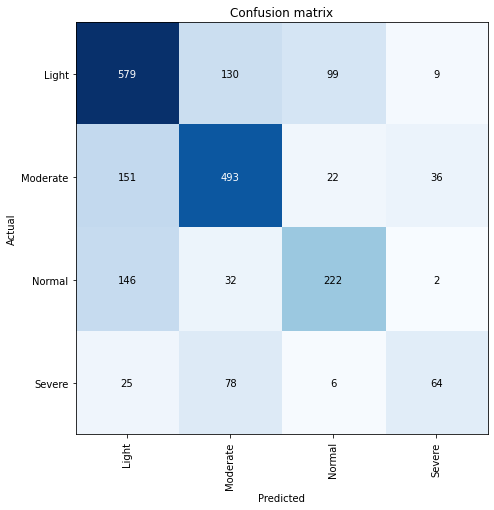

In [192]:
interp = ClassificationInterpretation.from_learner(CONUTlearn)
losses,idxs = interp.top_losses()
#len(salco.valid_ds)==len(losses)==len(idxs)
interp.plot_confusion_matrix(figsize=(7,7))

In [193]:
interp.print_classification_report()

              precision    recall  f1-score   support

       Light       0.64      0.71      0.67       817
    Moderate       0.67      0.70      0.69       702
      Normal       0.64      0.55      0.59       402
      Severe       0.58      0.37      0.45       173

    accuracy                           0.65      2094
   macro avg       0.63      0.58      0.60      2094
weighted avg       0.65      0.65      0.64      2094



In [194]:
preds,y, loss = CONUTlearn.get_preds(with_loss=True)
# get accuracy
acc = accuracy(preds, y)
print('The accuracy is {0} %.'.format(acc))

The accuracy is 0.6485195755958557 %.


In [195]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y == i, np.exp(preds[:, i]))
    roc_auc[i] = auc(fpr[i], tpr[i])

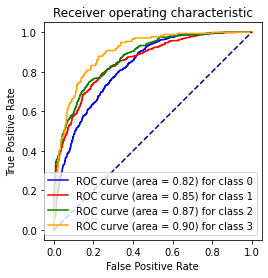

In [196]:
plt.figure()
colors = ['blue', 'red', 'green','orange']
for i, color in zip(range(4), colors):
    plt.plot(fpr[i], tpr[i], color=color,  label='ROC curve (area = %0.2f) for class %d' % (roc_auc[i], i))
#plt.plot(fpr[i], tpr[i], color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.axis("square")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

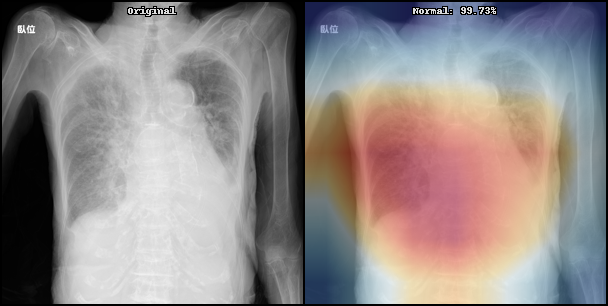

In [296]:
from fastai_amalgam.interpret.all import *
CONUTlearn.gradcam(over65merge["dir"][11],  img_size=None, show_original=True, font_size=20)

In [95]:
Hb = DataBlock(
        blocks=(ImageBlock(cls=PILImage), RegressionBlock),    # CategoryBlockがデフォルト https://docs.fast.ai/data.block.html
        splitter = RandomSplitter(),
        #getters=[ColReader('file'), ColReader('Sex')],
        get_x=ColReader('dir'),
        get_y=ColReader('Ｈｂ'),
        item_tfms = Resize(224)#(128)#(224)#, method='squish')
        #batch_tfms = [*aug_transforms(size = 384, mult=0.5), Normalize.from_stats(mean=0.53, std=0.23)]
        #batch_tfms=aug_transforms(max_zoom=1., flip_vert=True, max_lighting=0., max_warp=0.) + [Normalize]
        #item_tfms=Resize(460, method='squish'),
        #batch_tfms=[*aug_transforms(size=224, max_warp=0)]
        )

In [96]:
Hbdls= Hb.dataloaders(over65merge, bs=32)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


In [97]:
Hblearn = cnn_learner(Hbdls, resnet152,  y_range=(0,20), loss_func=MSELossFlat(), metrics=rmse)#50 101 152  #130, 200 y_range=(100,200),
Hblearn.fine_tune(4)

epoch,train_loss,valid_loss,_rmse,time
0,26.420834,7.677395,2.770811,04:33


epoch,train_loss,valid_loss,_rmse,time
0,5.721615,3.371715,1.836223,04:53
1,3.656727,3.373315,1.836659,04:49
2,2.507645,2.446661,1.564181,04:49
3,1.679302,2.254391,1.501463,04:49


In [98]:
preds, trues = Hblearn.tta()

In [99]:
preds = to_np(preds)
trues = to_np(trues)
preds2=np.squeeze(preds)
preds2

array([10.458189, 12.013223, 13.239477, ..., 10.100894, 11.509827,
       10.461008], dtype=float32)

Text(0, 0.5, '$Xray Calculated Hb$')

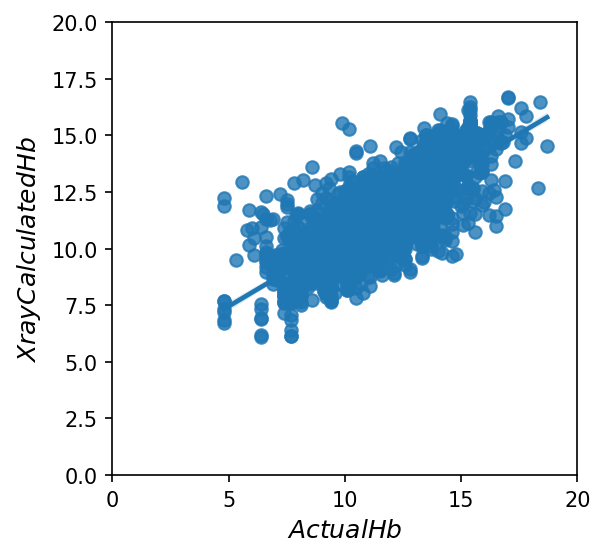

In [100]:
plt.figure(figsize=(4, 4), dpi=150)
#plt.scatter(trues, preds)
plt.xlim(0, 20)
plt.ylim(0, 20)
#plt.xlim(1, 3)
#plt.ylim(1, 3)
sns.regplot(x=trues, y=preds2);
#sns.jointplot(preds2, trues, kind="reg")

plt.xlabel(r'$Actual Hb$', fontsize=12)
plt.ylabel(r'$Xray Calculated Hb$', fontsize=12)

In [101]:
np.corrcoef(preds2, trues)

array([[1.        , 0.75867964],
       [0.75867964, 1.        ]])

In [126]:
Lym = DataBlock(
        blocks=(ImageBlock(cls=PILImage), RegressionBlock),    # CategoryBlockがデフォルト https://docs.fast.ai/data.block.html
        splitter = RandomSplitter(),
        #getters=[ColReader('file'), ColReader('Sex')],
        get_x=ColReader('dir'),
        get_y=ColReader('リンパ球数'),
        item_tfms = Resize(224)#(128)#(224)#, method='squish')
        #batch_tfms = [*aug_transforms(size = 384, mult=0.5), Normalize.from_stats(mean=0.53, std=0.23)]
        #batch_tfms=aug_transforms(max_zoom=1., flip_vert=True, max_lighting=0., max_warp=0.) + [Normalize]
        #item_tfms=Resize(460, method='squish'),
        #batch_tfms=[*aug_transforms(size=224, max_warp=0)]
        )

In [127]:
Lymdls= Lym.dataloaders(over65merge, bs=32)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


In [128]:
Lymlearn = cnn_learner(Lymdls, resnet152,  y_range=(0,10000), loss_func=MSELossFlat(), metrics=rmse)#50 101 152  #130, 200 y_range=(100,200),
Lymlearn.fine_tune(4)

epoch,train_loss,valid_loss,_rmse,time
0,6644183.000000,2591014.250000,1609.662964,04:15


epoch,train_loss,valid_loss,_rmse,time
0,2669581.750000,2028341.250000,1424.198364,04:37
1,1421546.625000,2286703.000000,1512.184814,04:36
2,1236071.375000,1027814.375000,1013.811829,04:40
3,887879.875000,954982.937500,977.232239,04:43


In [129]:
preds, trues = Lymlearn.tta()

In [130]:
preds = to_np(preds)
trues = to_np(trues)
preds2=np.squeeze(preds)
preds2

array([2981.4478, 1112.4243, 1092.1323, ...,  654.4148, 3056.4692,
        816.0559], dtype=float32)

Text(0, 0.5, '$Xray Calculated Lymphocyte$')

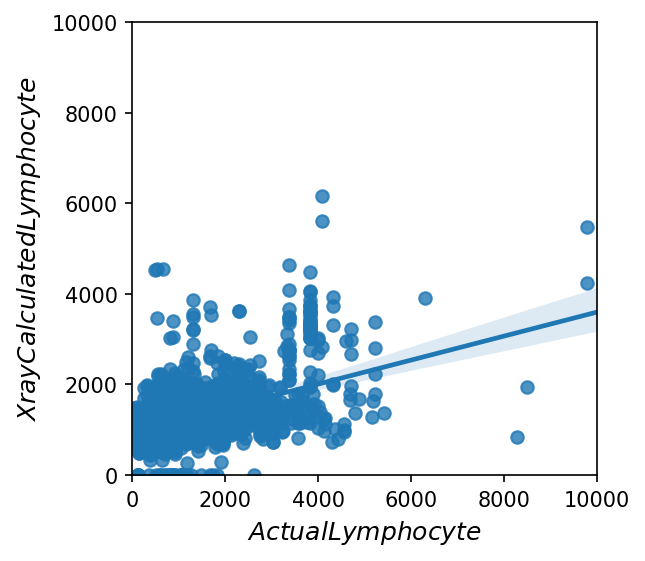

In [131]:
plt.figure(figsize=(4, 4), dpi=150)
#plt.scatter(trues, preds)
plt.xlim(0, 10000)
plt.ylim(0, 10000)
#plt.xlim(1, 3)
#plt.ylim(1, 3)
sns.regplot(x=trues, y=preds2);
#sns.jointplot(preds2, trues, kind="reg")

plt.xlabel(r'$Actual Lymphocyte$', fontsize=12)
plt.ylabel(r'$Xray Calculated Lymphocyte$', fontsize=12)

In [132]:
np.corrcoef(preds2, trues)

array([[1.        , 0.47093568],
       [0.47093568, 1.        ]])

In [116]:
UN = DataBlock(
        blocks=(ImageBlock(cls=PILImage), RegressionBlock),    # CategoryBlockがデフォルト https://docs.fast.ai/data.block.html
        splitter = RandomSplitter(),
        #getters=[ColReader('file'), ColReader('Sex')],
        get_x=ColReader('dir'),
        get_y=ColReader('UN'),
        item_tfms = Resize(224)#(128)#(224)#, method='squish')
        #batch_tfms = [*aug_transforms(size = 384, mult=0.5), Normalize.from_stats(mean=0.53, std=0.23)]
        #batch_tfms=aug_transforms(max_zoom=1., flip_vert=True, max_lighting=0., max_warp=0.) + [Normalize]
        #item_tfms=Resize(460, method='squish'),
        #batch_tfms=[*aug_transforms(size=224, max_warp=0)]
        )

In [117]:
UNdls= UN.dataloaders(over65merge, bs=32)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


In [118]:
UNlearn = cnn_learner(UNdls, resnet152,  y_range=(0,70), loss_func=MSELossFlat(), metrics=rmse)#50 101 152  #130, 200 y_range=(100,200),
UNlearn.fine_tune(4)

epoch,train_loss,valid_loss,_rmse,time
0,511.344208,358.533508,18.934980,04:28


epoch,train_loss,valid_loss,_rmse,time
0,263.691040,240.000092,15.491936,04:52
1,208.908600,194.484970,13.945787,04:51
2,151.434738,172.060684,13.117192,04:50
3,104.998207,162.619263,12.752225,04:50


In [119]:
preds, trues = UNlearn.tta()

In [120]:
preds = to_np(preds)
trues = to_np(trues)
preds2=np.squeeze(preds)
preds2

array([18.226067, 17.368767, 33.199844, ..., 31.427317, 22.518024,
       27.466623], dtype=float32)

Text(0, 0.5, '$Xray Calculated UN$')

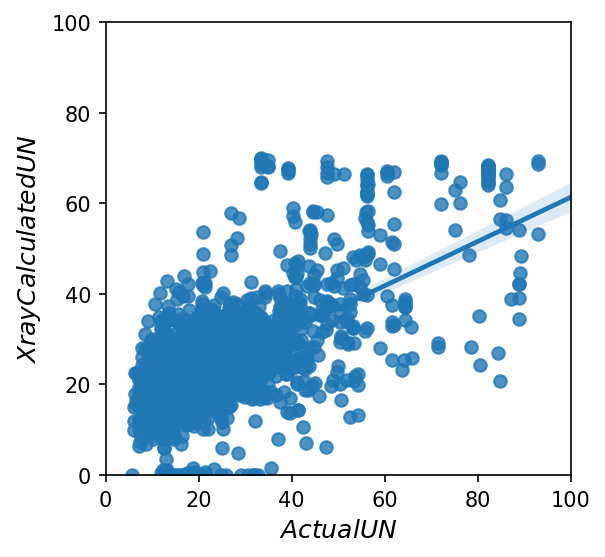

In [121]:
plt.figure(figsize=(4, 4), dpi=150)
#plt.scatter(trues, preds)
plt.xlim(0, 100)
plt.ylim(0, 100)
#plt.xlim(1, 3)
#plt.ylim(1, 3)
sns.regplot(x=trues, y=preds2);
#sns.jointplot(preds2, trues, kind="reg")

plt.xlabel(r'$Actual UN$', fontsize=12)
plt.ylabel(r'$Xray Calculated UN$', fontsize=12)

In [122]:
np.corrcoef(preds2, trues)

array([[1.        , 0.68972311],
       [0.68972311, 1.        ]])

In [21]:
GNRI = DataBlock(
        blocks=(ImageBlock(cls=PILImage), RegressionBlock),    # CategoryBlockがデフォルト https://docs.fast.ai/data.block.html
        splitter = RandomSplitter(),
        #getters=[ColReader('file'), ColReader('Sex')],
        get_x=ColReader('dir'),
        get_y=ColReader('GNRI'),
        item_tfms = Resize(224)#(128)#(224)#, method='squish')
        #batch_tfms = [*aug_transforms(size = 384, mult=0.5), Normalize.from_stats(mean=0.53, std=0.23)]
        #batch_tfms=aug_transforms(max_zoom=1., flip_vert=True, max_lighting=0., max_warp=0.) + [Normalize]
        #item_tfms=Resize(460, method='squish'),
        #batch_tfms=[*aug_transforms(size=224, max_warp=0)]
        )

In [22]:
Gdls= GNRI.dataloaders(over65merge, bs=32)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


In [23]:
Glearn = cnn_learner(Gdls, resnet152,  y_range=(50,120), loss_func=MSELossFlat(), metrics=rmse)#50 101 152  #130, 200 y_range=(100,200),
Glearn.fine_tune(4)

epoch,train_loss,valid_loss,_rmse,time
0,395.821655,217.184311,14.737175,04:19


epoch,train_loss,valid_loss,_rmse,time
0,127.753326,95.022537,9.747950,04:38
1,84.689682,115.127861,10.729765,04:39
2,70.951141,75.409485,8.683863,04:38
3,46.375263,70.443329,8.393052,04:38


In [24]:
preds, trues = Glearn.tta()

In [25]:
preds = to_np(preds)
trues = to_np(trues)
preds2=np.squeeze(preds)
preds2

array([99.96688 , 95.38139 , 87.502365, ..., 95.29448 , 96.07536 ,
       95.25005 ], dtype=float32)

Text(0, 0.5, '$Xray Calculated GNRI$')

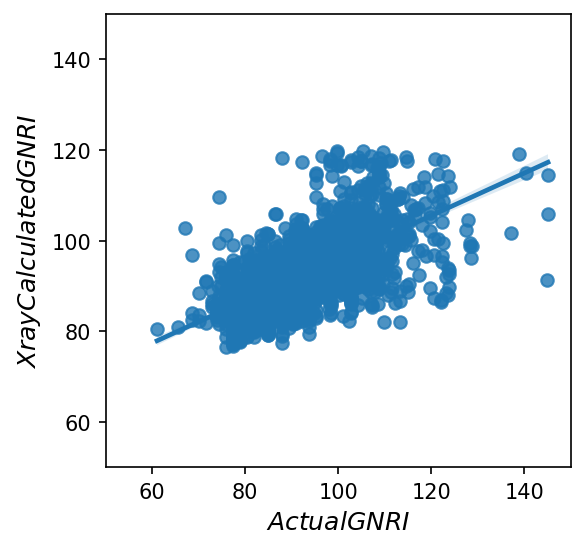

In [29]:
plt.figure(figsize=(4, 4), dpi=150)
#plt.scatter(trues, preds)
plt.xlim(50, 150)
plt.ylim(50, 150)
#plt.xlim(1, 3)
#plt.ylim(1, 3)
sns.regplot(x=trues, y=preds2);
#sns.jointplot(preds2, trues, kind="reg")

plt.xlabel(r'$Actual GNRI$', fontsize=12)
plt.ylabel(r'$Xray Calculated GNRI$', fontsize=12)

In [28]:
np.corrcoef(preds2, trues)

array([[1.        , 0.64443307],
       [0.64443307, 1.        ]])

In [ ]:
##GNRI score

In [31]:
GNRIscore = DataBlock(
        blocks=(ImageBlock(cls=PILImage), CategoryBlock),    # CategoryBlockがデフォルト https://docs.fast.ai/data.block.html
        splitter = RandomSplitter(),
        #getters=[ColReader('file'), ColReader('Sex')],
        get_x=ColReader('dir'),
        get_y=ColReader('GNRI score'),
        item_tfms = Resize(224)#(128)#(224)#, method='squish')
        #batch_tfms = [*aug_transforms(size = 384, mult=0.5), Normalize.from_stats(mean=0.53, std=0.23)]
        #batch_tfms=aug_transforms(max_zoom=1., flip_vert=True, max_lighting=0., max_warp=0.) + [Normalize]
        #item_tfms=Resize(460, method='squish'),
        #batch_tfms=[*aug_transforms(size=224, max_warp=0)]
        )

In [32]:
GNRIscoredls = GNRIscore.dataloaders(over65merge, bs=32)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


In [33]:
Gslearn = cnn_learner(GNRIscoredls, resnet34, metrics=accuracy)
Gslearn.fine_tune(4)

epoch,train_loss,valid_loss,accuracy,time
0,1.643284,1.252418,0.493870,03:53


epoch,train_loss,valid_loss,accuracy,time
0,1.199329,1.070952,0.574301,03:52
1,0.964925,0.941290,0.629230,03:55
2,0.698252,0.837489,0.683178,03:52
3,0.439518,0.866550,0.689554,03:52


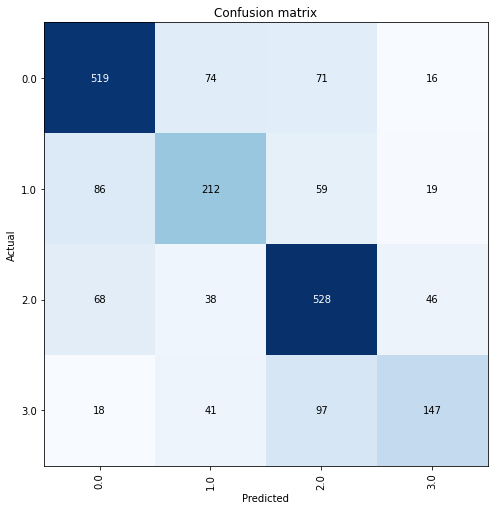

In [34]:
interp = ClassificationInterpretation.from_learner(Gslearn)
losses,idxs = interp.top_losses()
#len(salco.valid_ds)==len(losses)==len(idxs)
interp.plot_confusion_matrix(figsize=(7,7))

In [36]:
interp.print_classification_report()

              precision    recall  f1-score   support

         0.0       0.75      0.76      0.76       680
         1.0       0.58      0.56      0.57       376
         2.0       0.70      0.78      0.74       680
         3.0       0.64      0.49      0.55       303

    accuracy                           0.69      2039
   macro avg       0.67      0.65      0.65      2039
weighted avg       0.69      0.69      0.69      2039



In [165]:
preds,y, loss = Gslearn.get_preds(with_loss=True)
# get accuracy
acc = accuracy(preds, y)
print('The accuracy is {0} %.'.format(acc))

The accuracy is 0.6895536780357361 %.


In [166]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y == i, np.exp(preds[:, i]))
    roc_auc[i] = auc(fpr[i], tpr[i])
    
#preds,y, loss = SGAlearn.get_preds(with_loss=True)

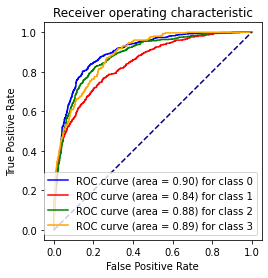

In [167]:
plt.figure()
colors = ['blue', 'red', 'green','orange']
for i, color in zip(range(4), colors):
    plt.plot(fpr[i], tpr[i], color=color,  label='ROC curve (area = %0.2f) for class %d' % (roc_auc[i], i))
#plt.plot(fpr[i], tpr[i], color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.axis("square")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

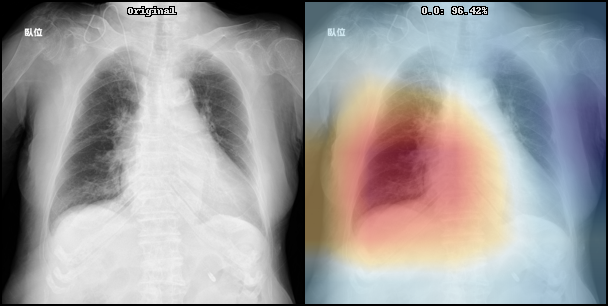

In [305]:
from fastai_amalgam.interpret.all import *
Gslearn.gradcam(over65merge["dir"][60],  img_size=None, show_original=True, font_size=20)#labels=None,

### 

In [50]:
SGA = DataBlock(
        blocks=(ImageBlock(cls=PILImage), CategoryBlock),    # CategoryBlockがデフォルト https://docs.fast.ai/data.block.html
        splitter = RandomSplitter(),
        #getters=[ColReader('file'), ColReader('Sex')],
        get_x=ColReader('dir'),
        get_y=ColReader('SGA'),
        item_tfms = Resize(224)#(128)#(224)#, method='squish')
        #batch_tfms = [*aug_transforms(size = 384, mult=0.5), Normalize.from_stats(mean=0.53, std=0.23)]
        #batch_tfms=aug_transforms(max_zoom=1., flip_vert=True, max_lighting=0., max_warp=0.) + [Normalize]
        #item_tfms=Resize(460, method='squish'),
        #batch_tfms=[*aug_transforms(size=224, max_warp=0)]
        )

In [51]:
SGAdls = SGA.dataloaders(over65merge, bs=32)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


In [52]:
SGAlearn = cnn_learner(SGAdls, resnet34, metrics=accuracy)
SGAlearn.fine_tune(4)

epoch,train_loss,valid_loss,accuracy,time
0,1.482369,0.958052,0.600529,02:52


epoch,train_loss,valid_loss,accuracy,time
0,0.963460,0.810979,0.620370,02:51
1,0.784338,0.694265,0.656746,02:50
2,0.629026,0.679547,0.672619,02:52
3,0.459024,0.712139,0.675926,02:51


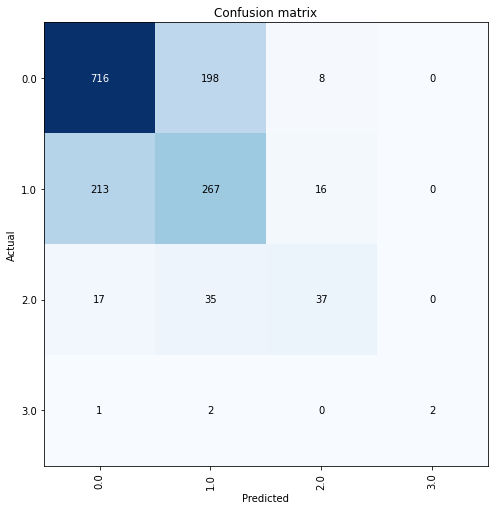

In [159]:
interp = ClassificationInterpretation.from_learner(SGAlearn)
losses,idxs = interp.top_losses()
#len(salco.valid_ds)==len(losses)==len(idxs)
interp.plot_confusion_matrix(figsize=(7,7))

In [54]:
interp.print_classification_report()

              precision    recall  f1-score   support

         0.0       0.76      0.78      0.77       922
         1.0       0.53      0.54      0.54       496
         2.0       0.61      0.42      0.49        89
         3.0       1.00      0.40      0.57         5

    accuracy                           0.68      1512
   macro avg       0.72      0.53      0.59      1512
weighted avg       0.67      0.68      0.67      1512



In [156]:
preds,y, loss = SGAlearn.get_preds(with_loss=True)
# get accuracy
acc = accuracy(preds, y)
print('The accuracy is {0} %.'.format(acc))

The accuracy is 0.6759259104728699 %.


In [92]:
SGAlearn.get_preds(with_loss=True)

(tensor([[5.7835e-01, 4.2126e-01, 3.1252e-04, 8.3375e-05],
         [7.0471e-01, 2.7714e-01, 1.5723e-02, 2.4258e-03],
         [4.0691e-01, 5.7049e-01, 2.1891e-02, 7.1279e-04],
         ...,
         [3.8408e-01, 5.7471e-01, 4.0878e-02, 3.3294e-04],
         [2.8923e-01, 7.0496e-01, 5.1274e-03, 6.8729e-04],
         [2.7123e-01, 6.9543e-01, 3.2832e-02, 5.0220e-04]]),
 tensor([0, 1, 1,  ..., 0, 1, 1]),
 TensorBase([0.5476, 1.2832, 0.5613,  ..., 0.9569, 0.3496, 0.3632]))

In [93]:
SGAlearn.validate()

(#2) [0.7121385931968689,0.6759259104728699]

In [ ]:
from sklearn.metrics import plot_roc_curve
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train[:,0])
label_0= plot_roc_curve(clf, X_test, y_test[:,0], name= 'label 0',)  
plt.show() 

In [89]:
confusion_matrix(y, preds.argmax(dim=-1)).ravel()

array([716, 198,   8,   0, 213, 267,  16,   0,  17,  35,  37,   0,   1,
         2,   0,   2], dtype=int64)

In [90]:
from sklearn.metrics import roc_curve, auc
# probs from log preds
probs = np.exp(preds[:,1])
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y, probs, pos_label=1)

# Compute ROC area
roc_auc = auc(fpr, tpr)
print('ROC area is {0}'.format(roc_auc))

ROC area is 0.7332607712090424


In [157]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y == i, np.exp(preds[:, i]))
    roc_auc[i] = auc(fpr[i], tpr[i])
    
#preds,y, loss = SGAlearn.get_preds(with_loss=True)

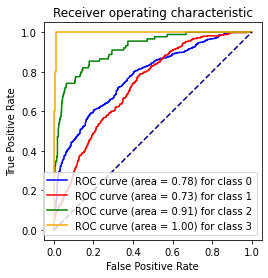

In [161]:
plt.figure()
colors = ['blue', 'red', 'green','orange']
for i, color in zip(range(4), colors):
    plt.plot(fpr[i], tpr[i], color=color,  label='ROC curve (area = %0.2f) for class %d' % (roc_auc[i], i))
#plt.plot(fpr[i], tpr[i], color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.axis("square")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

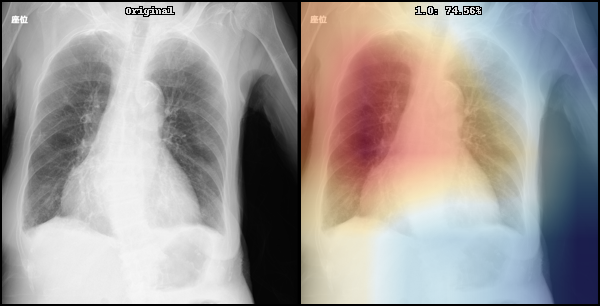

In [308]:
from fastai_amalgam.interpret.all import *
SGAlearn.gradcam(over65merge["dir"][500],  img_size=None, show_original=True, font_size=20)#labels=None,

In [57]:
NST = DataBlock(
        blocks=(ImageBlock(cls=PILImage), CategoryBlock),    # CategoryBlockがデフォルト https://docs.fast.ai/data.block.html
        splitter = RandomSplitter(),
        #getters=[ColReader('file'), ColReader('Sex')],
        get_x=ColReader('dir'),
        get_y=ColReader('NST介入'),
        item_tfms = Resize(224)#(128)#(224)#, method='squish')
        #batch_tfms = [*aug_transforms(size = 384, mult=0.5), Normalize.from_stats(mean=0.53, std=0.23)]
        #batch_tfms=aug_transforms(max_zoom=1., flip_vert=True, max_lighting=0., max_warp=0.) + [Normalize]
        #item_tfms=Resize(460, method='squish'),
        #batch_tfms=[*aug_transforms(size=224, max_warp=0)]
        )

In [58]:
NSTdls = NST.dataloaders(over65merge, bs=32)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


In [59]:
NSTlearn = cnn_learner(NSTdls, resnet34, metrics=accuracy)
NSTlearn.fine_tune(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.631334,0.500464,0.787586,04:10


epoch,train_loss,valid_loss,accuracy,time
0,0.434326,0.389600,0.828966,04:10
1,0.365549,0.364872,0.846437,04:12
2,0.283778,0.305298,0.867126,04:14
3,0.177315,0.337247,0.870345,04:13


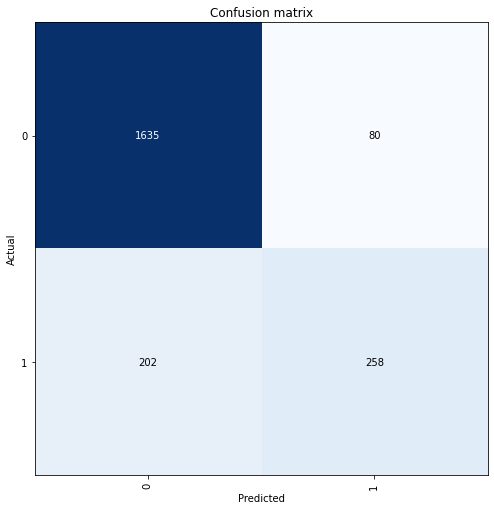

In [60]:
interp = ClassificationInterpretation.from_learner(NSTlearn)
losses,idxs = interp.top_losses()
#len(salco.valid_ds)==len(losses)==len(idxs)
interp.plot_confusion_matrix(figsize=(7,7))

In [61]:
interp.print_classification_report()

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1715
           1       0.76      0.56      0.65       460

    accuracy                           0.87      2175
   macro avg       0.83      0.76      0.78      2175
weighted avg       0.86      0.87      0.86      2175



In [143]:
preds,y, loss = NSTlearn.get_preds(with_loss=True)
# get accuracy
acc = accuracy(preds, y)
print('The accuracy is {0} %.'.format(acc))

The accuracy is 0.8703448176383972 %.


In [73]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y, preds.argmax(dim=-1)).ravel()
#tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
specificity = tn / (tn+fp)
specificity

0.9533527696793003

In [144]:
from sklearn.metrics import roc_curve, auc
# probs from log preds
probs = np.exp(preds[:,1])
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y, probs, pos_label=1)

# Compute ROC area
roc_auc = auc(fpr, tpr)
print('ROC area is {0}'.format(roc_auc))

ROC area is 0.8971973634174166


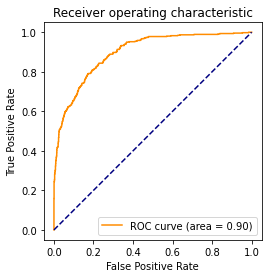

In [145]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.axis("square")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

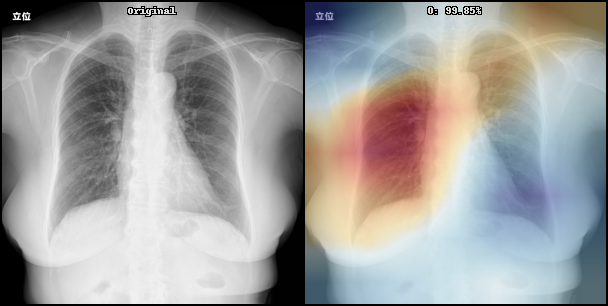

In [470]:
from fastai_amalgam.interpret.all import *
NSTlearn.gradcam(over65merge["dir"][number],  img_size=None, show_original=True, font_size=20)#labels=None,

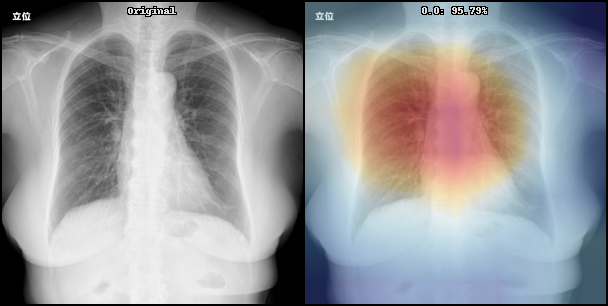

In [471]:
Gslearn.gradcam(over65merge["dir"][number],  img_size=None, show_original=True, font_size=20)

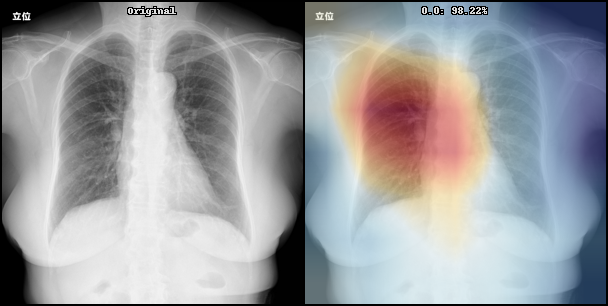

In [473]:
SGAlearn.gradcam(over65merge["dir"][number],  img_size=None, show_original=True, font_size=20)

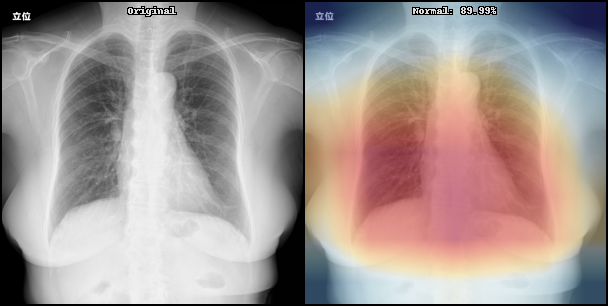

In [474]:
CONUTlearn.gradcam(over65merge["dir"][number],  img_size=None, show_original=True, font_size=20)

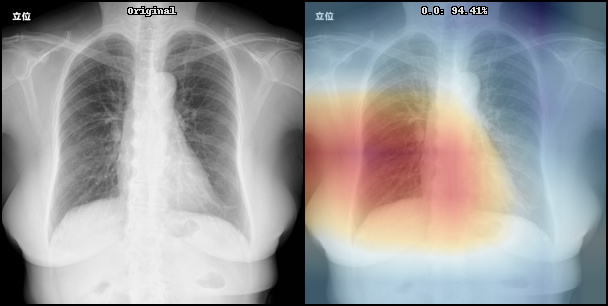

In [475]:
GLIMlearn.gradcam(over65merge["dir"][number],  img_size=None, show_original=True, font_size=20)

In [134]:
GLIM = DataBlock(
        blocks=(ImageBlock(cls=PILImage), CategoryBlock),    # CategoryBlockがデフォルト https://docs.fast.ai/data.block.html
        splitter = RandomSplitter(),
        #getters=[ColReader('file'), ColReader('Sex')],
        get_x=ColReader('dir'),
        get_y=ColReader('GLIM severity'),
        item_tfms = Resize(224)#(128)#(224)#, method='squish')
        #batch_tfms = [*aug_transforms(size = 384, mult=0.5), Normalize.from_stats(mean=0.53, std=0.23)]
        #batch_tfms=aug_transforms(max_zoom=1., flip_vert=True, max_lighting=0., max_warp=0.) + [Normalize]
        #item_tfms=Resize(460, method='squish'),
        #batch_tfms=[*aug_transforms(size=224, max_warp=0)]
        )

In [135]:
GLIMdls = GLIM.dataloaders(over65merge, bs=32)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


In [136]:
GLIMlearn = cnn_learner(GLIMdls, resnet34, metrics=accuracy)
GLIMlearn.fine_tune(4)

epoch,train_loss,valid_loss,accuracy,time
0,1.582889,1.152692,0.531410,04:08


epoch,train_loss,valid_loss,accuracy,time
0,1.156265,1.094368,0.564449,04:09
1,0.987993,0.930615,0.622150,04:13
2,0.774617,0.886061,0.648208,04:13
3,0.470735,0.914058,0.663564,04:09


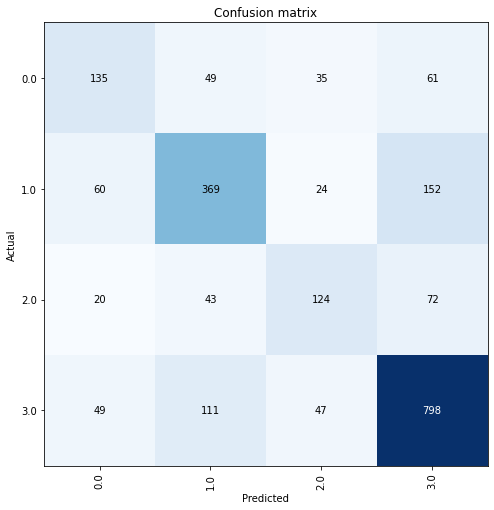

In [137]:
interp = ClassificationInterpretation.from_learner(GLIMlearn)
losses,idxs = interp.top_losses()
#len(salco.valid_ds)==len(losses)==len(idxs)
interp.plot_confusion_matrix(figsize=(7,7))

In [138]:
interp.print_classification_report()

              precision    recall  f1-score   support

         0.0       0.51      0.48      0.50       280
         1.0       0.65      0.61      0.63       605
         2.0       0.54      0.48      0.51       259
         3.0       0.74      0.79      0.76      1005

    accuracy                           0.66      2149
   macro avg       0.61      0.59      0.60      2149
weighted avg       0.66      0.66      0.66      2149



In [162]:
preds,y, loss = GLIMlearn.get_preds(with_loss=True)
# get accuracy
acc = accuracy(preds, y)
print('The accuracy is {0} %.'.format(acc))

The accuracy is 0.6635644435882568 %.


In [163]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y == i, np.exp(preds[:, i]))
    roc_auc[i] = auc(fpr[i], tpr[i])
    
#preds,y, loss = SGAlearn.get_preds(with_loss=True)

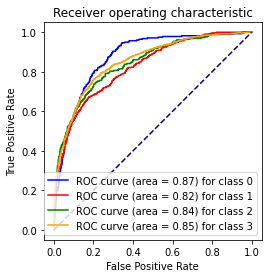

In [164]:
plt.figure()
colors = ['blue', 'red', 'green','orange']
for i, color in zip(range(4), colors):
    plt.plot(fpr[i], tpr[i], color=color,  label='ROC curve (area = %0.2f) for class %d' % (roc_auc[i], i))
#plt.plot(fpr[i], tpr[i], color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.axis("square")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

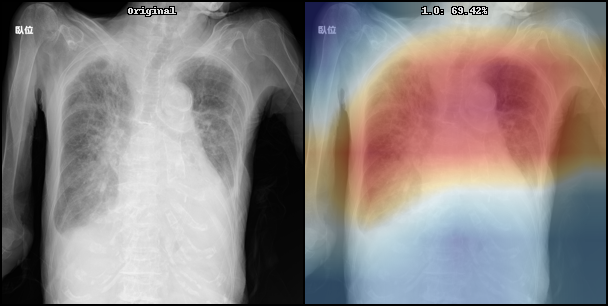

In [185]:
from fastai_amalgam.interpret.all import *
GLIMlearn.gradcam(over65merge["dir"][10],  img_size=None, show_original=True, font_size=20)#labels=None,